# 教師なし学習の種類

データセットの教師なし変換(Unsupervised transformations)
---

### ① 次元削減
- たくさんの特徴量で構成されるデータの高次元表現を入力として、少量の本質的な特徴を表す特徴量でそのデータを表す要約方法を見つける
- 可視化のために次元数を2次元に減らす際にも使われる

### ② そのデータを「構成する」部品、もしくは成分を見つける
- 例えば文書データの集合からのトピック抽出

クラスタリングアルゴリズム(Clustering algorithms)
---
- データを似たような要素から構成されるグループに分けるアルゴリズム


In [1]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
!pip install mglearn
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
%matplotlib inline

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


様々な前処理
---

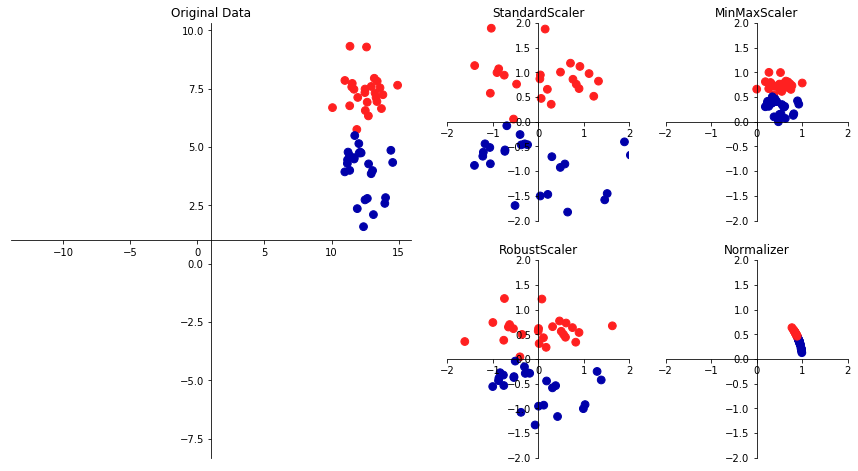

In [2]:
mglearn.plots.plot_scaling()

- 左のプロット２特徴量の2クラス分類合成データセット
    - 第一の特徴量(x軸)は10~15
    - 第二の特徴量(y軸)は1~9の間にある

### StandardScaler
- 個々の特徴量の平均が0で分散が1になるように変換する(中央化?)
- この方法は特徴量の最大値や最小値がある範囲に入ることを保証するものではない

### RobustScaler
- 平均値の分散の代わりに中央値と四分位数を用いる
    - ※第2四分位とは全体の1/4がxより小さく3/4が大きいような数
    - ※第3四分位とは全体の3/4がxより小さく1/4が大きいような数
- 極端に他の値と異なるような値(測定エラー)を無視する
    - ハズレ値(outliner)
        
### MinMaxScaler
- データがちょうど0から1に入るように変換する

### Normalizer
- 個々のデータポイントを特徴量ベクトルがユークリッド長１になるように変換する
- 言い換えるとデータポイントを半径1の円(より高次元なら超球面)に投射する
- 全てのデータポイントに対してそれぞれ異なるスケール変換が行われる(もとのユークリッド長の逆数を掛ける)
- この変換は特徴量のベクトルの長さではなく、方向(もしくは角度)だけが問題になる場合に用いられる

データ変換の適用
---

In [3]:
# cancerデータの準備
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
# スケール変換器の準備
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 適用
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# データを変換
X_train_scled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print("transformed shape: {}".format(X_train_scled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print(f"per-feature maximum before scaling:\n {X_train.max(axis=0)}")
print(f"per-feature minimum after scaling:\n {X_train_scled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n {X_train_scled.max(axis=0)}")

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)
# スケール変換の前後のデータ特性をプリント
print(f"per-feature minimum after scaling:\n {X_test_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n {X_test_scaled.max(axis=0)}")

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


- テストセットの場合はスケール変換後の最小値と最大値が0と1にならない
- これはスケール変換器が常に訓練データとテストデータに全く同じ変換を施すため
- transformメソッドは常に訓練データの最小値を引き、訓練データのレンジで割る

#### 備考
- fitを訓練データで行ってるからそれは当たり前のような気がする

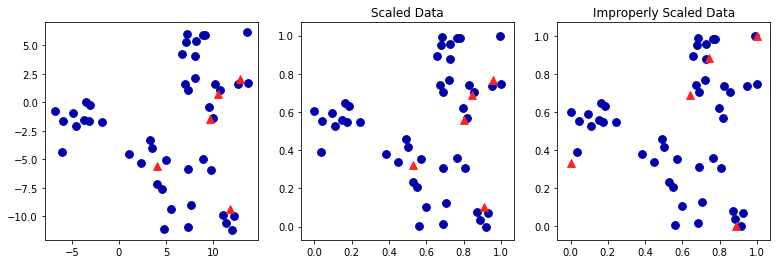

In [8]:
from sklearn.datasets import make_blobs
# 合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2(1), marker='^', label="Test set", s=60)

# MInMaxScaler()でスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=mglearn.cm2(1), marker='^', label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0,1になる
# ここでは説明のためにわざとやっているが実際にやってはいけない
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], c=mglearn.cm2(1), marker='^', label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

- 訓練データとテストデータを別でスケールするとデータの特性自体が変化してしまう

教師あり学習における前処理の効果
---

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print(f"Test set accuracy: {svm.score(X_test, y_test):.2f}")


Test set accuracy: 0.63


- SVMはスケールの影響を強くうけるため、前処理を行わないと精度が低い

In [10]:
# 0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print(f"Scaled test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Scaled test set accuracy: 0.97


- データに対するスケール変換の影響は非常に大きい

In [11]:
# 平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print(f"Scaled test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Scaled test set accuracy: 0.96


次元削減、特徴量抽出、多様体学習
---

教師なし学習を用いたデータ変換の主な動機

- 可視化
- データの圧縮
- 以降の処理に的ｈした表現の発見

これらの全ての目的に対して最もよく用いられているアルゴリズムが、主成分分析(principal component analysis: PCA)

### 主成分分析(PCA)
- 主成分分析とはデータセットの特徴量を相互に統計的に関連しないように回転する手法
- 多くの場合、回転したあとの特徴量からデータを説明するのに重要な一部の特徴量だけを抜き出す

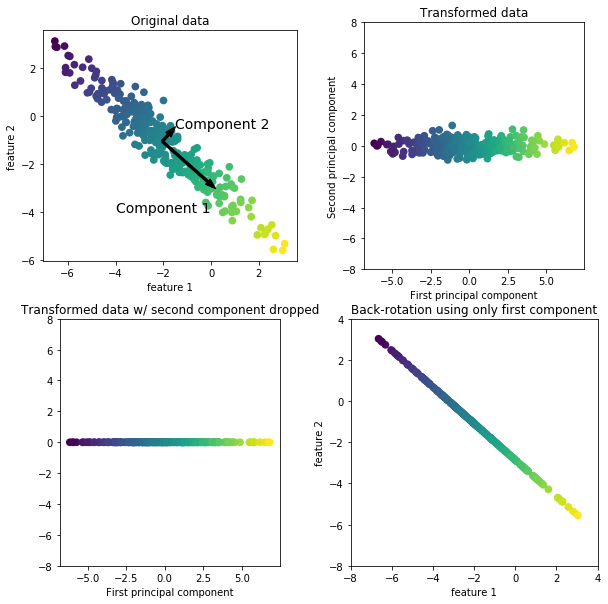

In [12]:
mglearn.plots.plot_pca_illustration()

#### 左上のプロットはもとのデータセット
- 1.まず最も分散の大きい方向を見つけそれに「第１成分」とうラベルをつける(左上プロットのComponent1)
    - データはこの方向(もしくはベクトル)に対して最も情報を持つ
- 2.次にアルゴリズムは第１成分と直交する(直角に交わる)方向の中から最も情報を持っている方向を探す(左上プロットのComponent2)
    - 2次元の場合は直交する方向は1つだが、多次元の場合は多くの方向が存在する
    - 重要なのは傾きの大きさのみ
- このように見つけていく「方向」のことを「主成分」と呼ぶ

#### 右上のプロット
- 同じデータを最初の主成分がx軸に沿い、2つ目の主成分がy軸に沿うように回転させたもの
- 原点の周辺にデータが来るように、回転させる前にデータから平均値を引いてある
- PCAで見つかった回転後の表現では2つの軸の相関はない
    - この表現でのデータの相関行列は体格成分を除いてゼロである

#### 左下のプロット
- 1つ目の主成分だけ残す
- こうすることでPCAを次元削減に使うこともできる
- もとの特徴量のうち1つを残しているのではなく、最も興味深い方向(左上から左下)だけを維持している

#### 右下のプロット
- 逆回転して平均を足し、データをもとに戻すこともできる
- データポイントはもとの特徴量空間にあるが第1主成分に含まれている情報しか維持されていない
- このような変換はデータからノイズを取り除いたり、主成分で維持された情報を可視化するために用いられることがある

### cancerデータセットのPCAによる可視化


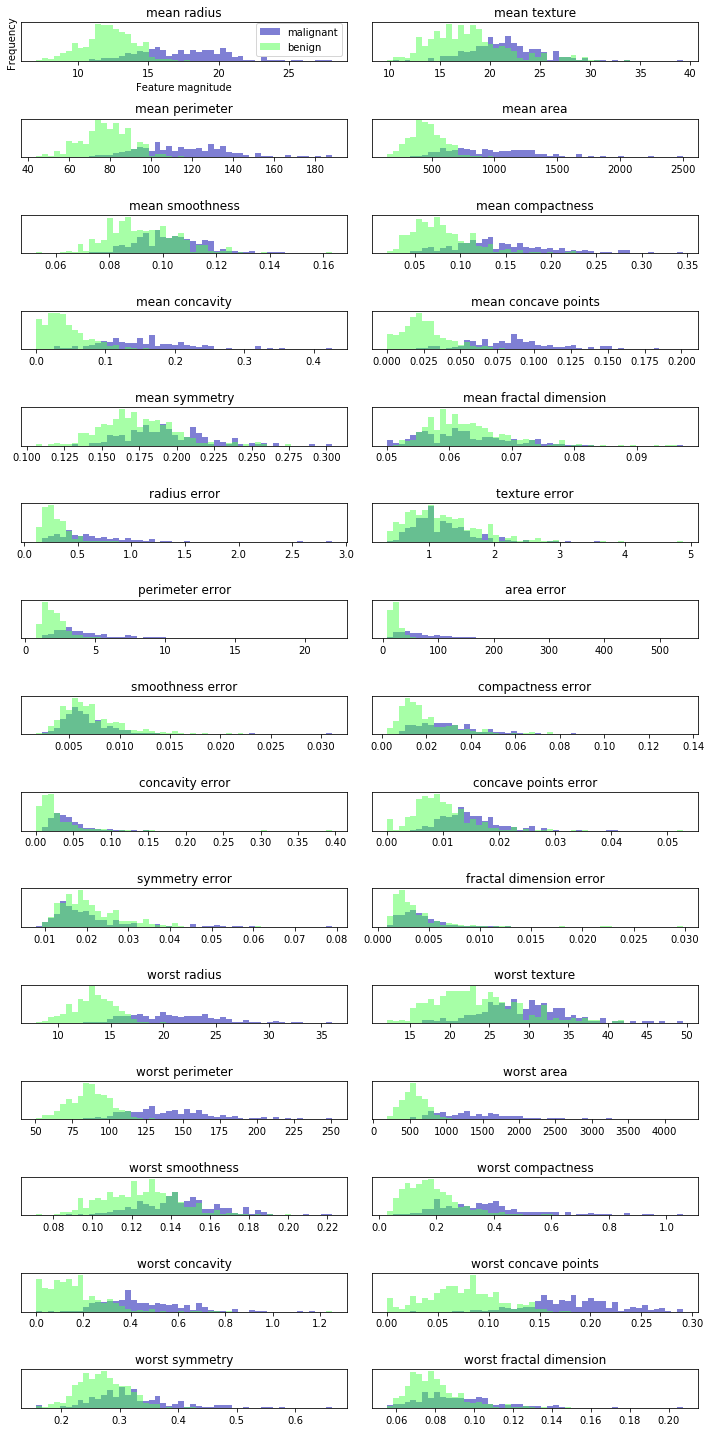

In [13]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

- データセットに対するクラスごとのヒストグラム
- 個々の特徴量の2つのクラスに対する分布がわかり、どの特徴量が陽性と悪性を見分けるのに役に立ちそうかを類推することができる
    - smoothness error はヒストグラムがほとんど重なっているため情報量がすくない
    - worst concave pointsはほとんど重なっていないため情報量が多い
- このプロットをみても個々の特徴量の相関やそれがクラス分類に与える影響については何もわからない    

In [14]:
# まずはStanderdScalerを使って分散を1にする
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [15]:
# PCA変換の学習と適用
from sklearn.decomposition import PCA
# データの最初の2つの主成分だけ維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の２つの主成分に対してデータポイント変換
X_pca = pca.transform(X_scaled)
print(f"Original shape:{str(X_scaled.shape)} ")
print(f"Reduced shape:{str(X_pca.shape)} ")

Original shape:(569, 30) 
Reduced shape:(569, 2) 


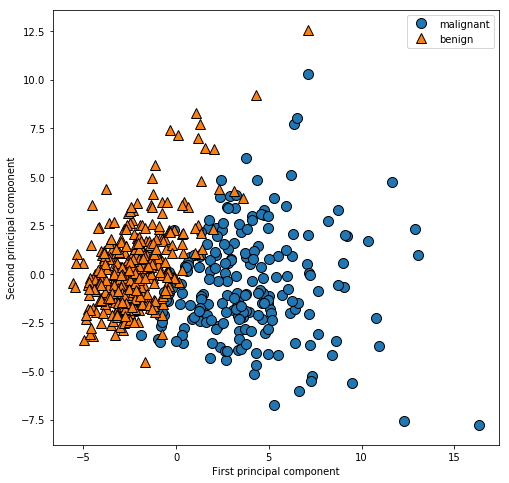

In [16]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 第一主成分に対して第２主成分をクラス情報をつかって色分けしている
- この2次元空間ではこの2つのクラスがキレイに分離できている
- これをみると線形クラス分類機でもそれなりに分類できそうとうことが分かる
- また悪性のデータポイントは良性のデータポイントよりも広がっている

In [17]:
print("PCA component shape: {}".format(pca.components_))

PCA component shape: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


- 主成分はPCAの適合を行う過程でcomponent_属性に格納される

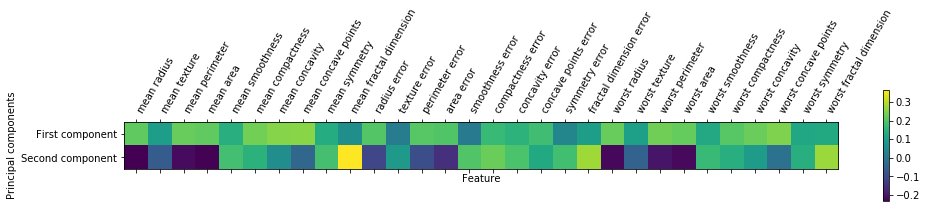

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)) ,cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 固有顔による特徴量抽出


- PCAのもう一つの利用方法として特徴量抽出がある
- 特徴量抽出が効果をもつアプリケーションとしては画像関連が挙げられる

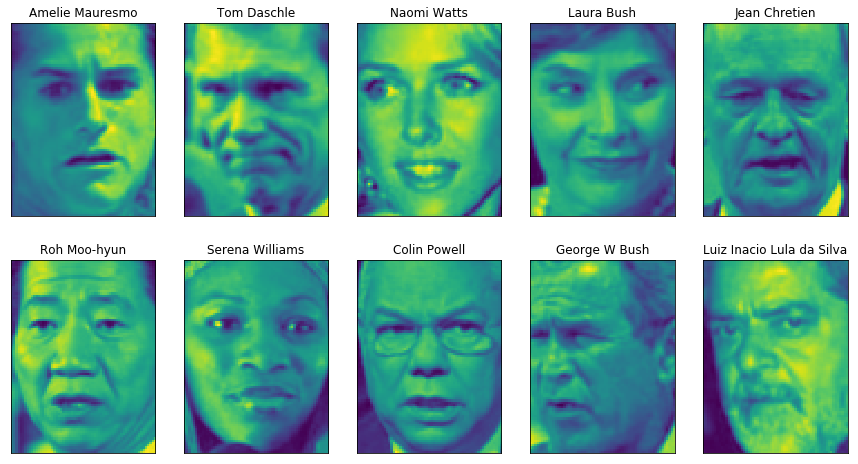

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [20]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2986, 87, 65)
Number of classes: 61


In [21]:
# 各ターゲットの出現回数をカウント
counts = np.bincount(people.target)
# ターゲット名と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='\t')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39	Alvaro Uribe               35	Amelie Mauresmo            21	
Andre Agassi               36	Angelina Jolie             20	Ariel Sharon               77	
Arnold Schwarzenegger      42	Atal Bihari Vajpayee       24	Bill Clinton               29	
Carlos Menem               21	Colin Powell              236	David Beckham              31	
Donald Rumsfeld           121	George Robertson           22	George W Bush             530	
Gerhard Schroeder         109	Gloria Macapagal Arroyo    44	Gray Davis                 26	
Guillermo Coria            30	Hamid Karzai               22	Hans Blix                  39	
Hugo Chavez                71	Igor Ivanov                20	Jack Straw                 28	
Jacques Chirac             52	Jean Chretien              55	Jennifer Aniston           21	
Jennifer Capriati          42	Jennifer Lopez             21	Jeremy Greenstock          24	
Jiang Zemin                20	John Ashcroft              53	John Negroponte            31	

- このデータにはここの枚数に偏りがある(George W Bushは530枚ある)
- 偏りを減らすため各人の画像を50に制限する

In [22]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値0-1の間に変換
# こうした方が数値的に安定する
X_people = X_people / 255.

- 一般的な顔認識のタスクとして見たことのない顔がデータベース上に登録されているかを判定するものがある
- この問題を解く１つの方法は、個々の人物を異なる方法として学習すること
    - しかし、おおくの場合顔データベースにはたくさんの人物が登録されており同じ人物の画像は少ない
- もう一つの簡単な方法として、1-最近傍法クラス分類器を使う方法がある

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# 訓練セットとテストデータにデータを分割
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifierを1-最近傍法で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test, y_test):.2f}")

Test set score of 1-nn: 0.24


- 62クラス分類であることを考えるとそれほど悪くはないが、それほど良くもない

#### PCAの主成分分析を使う
- もとのピクセルの空間で距離を計算するのは顔の近似度を測るのには適してはいない
    - ピクセル表現で2つの画像を比較するということは相互の画像の対応するピクセルの値を比較することになる
- ここではPCAのwhitenオプションを使う
    - これを用いると主成分が同じスケールになるようにスケール変換をする
    - PCAによる変換後にStandardScalerをかけるのと同じ

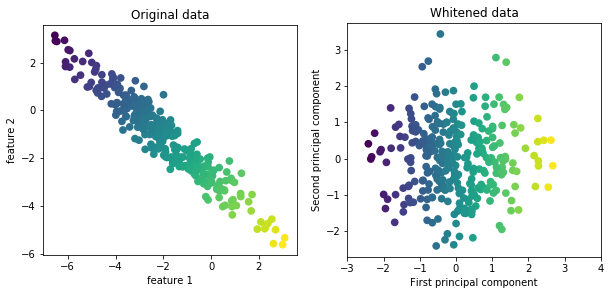

In [24]:
mglearn.plots.plot_pca_whitening()

- whitenオプションをつけるとデータを回転するだけではなく、楕円ではなく円を描くようにスケール変換する
- PCAオブジェクトを訓練して最初の100の主成分を抜き出す

In [25]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca.shape: {X_train_pca.shape}")

X_train_pca.shape: (1519, 100)


In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test_pca, y_test):.2f}")

Test set score of 1-nn: 0.31


- 精度が向上している
- 画像データについては、見つけた主成分を容易に可視化することができる

In [27]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


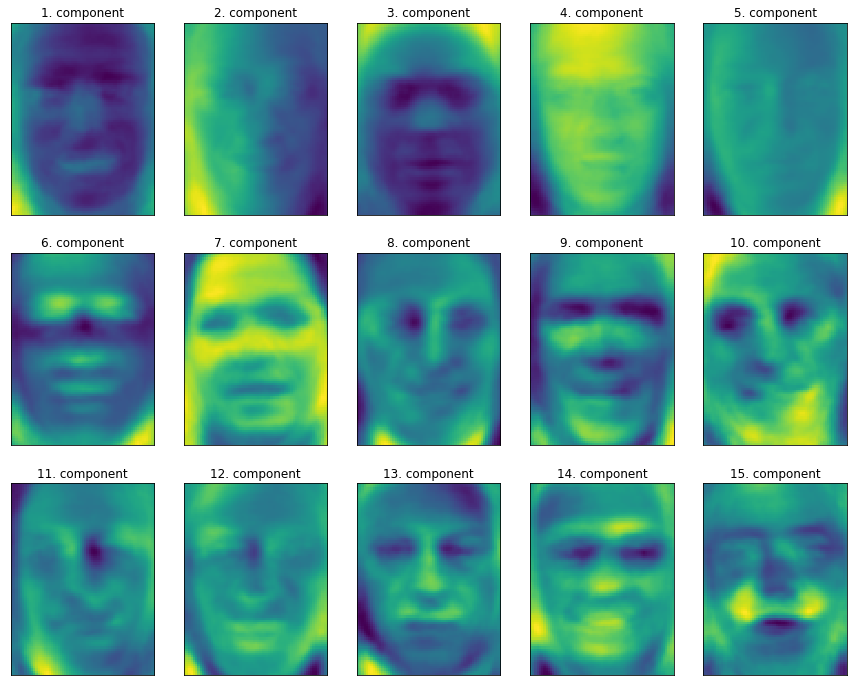

In [28]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

- これらが顔画像のどの側面を捉えているか全てを理解することはできないがいくつかを推測することはできる
- 例えば最初の主成分は顔と背景のコントラクトをコーディングしている
- 2つめは光の当たり方による顔の左右の明るさの差をコーディングしているように見える
- PCAモデルはピクセルに基づいているため、ピクセルでの表現された2つの画像の差には顔のアライメント(目、顎、鼻の位置)や光のあたり具合が強い影響を与えてしまう

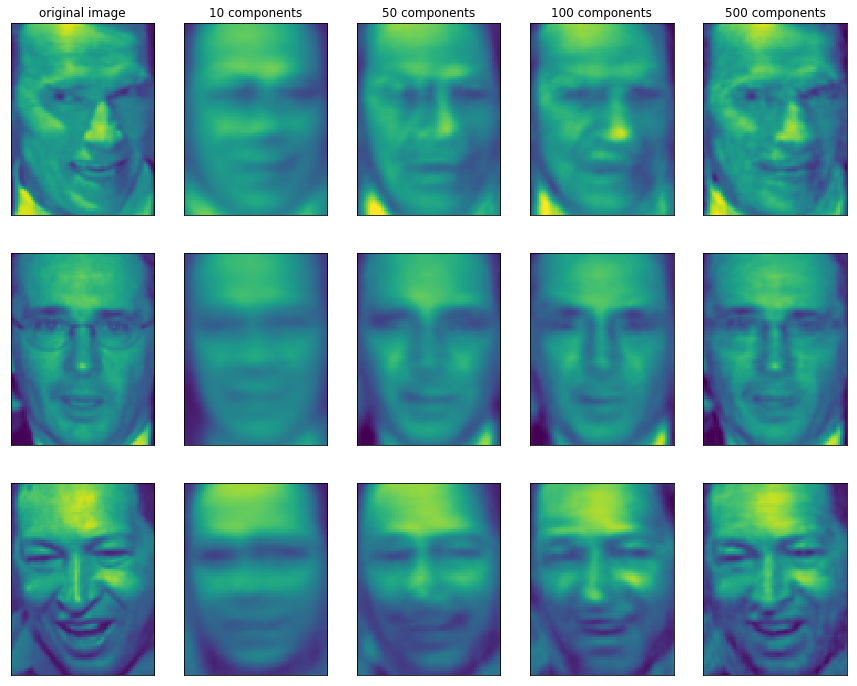

In [29]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

- PCA変換は、回転させてから分散に小さい主成分を落とすものだが、もう一つの解釈として、PCAはテストデータポイントを主成分の主見つけわとして表現しているとも言える
    - 各主成分を逆回転してもとの空間に戻して足すと、もとの画像に戻せるということ
    - このもとの特徴空間へ戻す作業は「inverse_transform」メソッドで行うことができる
- 上記は、顔画像をそれぞれ10. 50, 100, 500の主成分を用いて再構築したもの

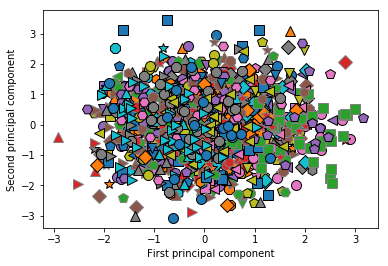

In [30]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 上記は、PCAを用いてデータセット中の全ての顔を最初の2つの主成分を用いて散布図にプロットしたもの
- 最初の2主成分ではデータ全体がひとまとまりになってしまい、クラスを分離できそうもないことがわかる

非負値行列因子分解(Non-negative matrix factorization: NMF)
---
- NMFも有用な特徴量を抽出することを目的とする教師なしアルゴリズム
- PCAと同様に次元削減に用いることができる
- NMFでは係数と成分が非負であること、つまり成分とその係数が常にゼロ以上であることが求められる
- データを非負の重み付き和に分解する方法は、いくつもの独立した発生源から得られたデータを重ね合わせて作られるデータに対して特に有効
    - 例えば複数の人が話している音声データや多数の楽器からなる音楽など
- このような場合にNMFを用いると組み合わされたデータを作り上げているもとの成分を特定することができる
- NMFではPCAよりも理解しやすい成分に分解してくれる

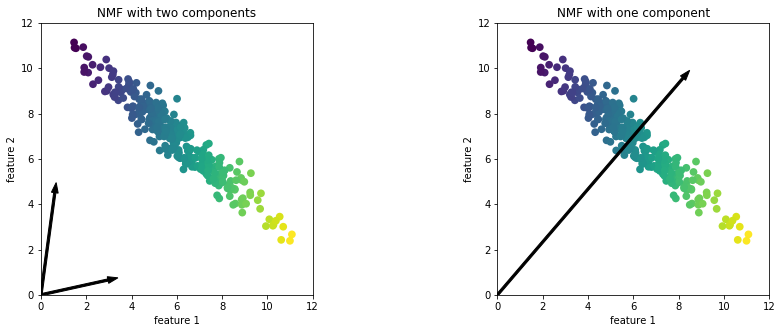

In [31]:
mglearn.plots.plot_nmf_illustration()

- 完全にデータを再現するのに十分な数の成分がある場合には(特徴量と同じだけの成分がある場合には)このアルゴリズムはデータの極端な部分の方向を向く
    - 左の図
- 一つしか成分を使わない場合には、データの平均値へ向かう成分を作る(右の図)
- PCAとは異なり、成分の数が変わるといくつかの成分がなくなるのではなく、全く別の成分集合が構成される
- NMFの成分は特定な順番でならんでいるわけではない
    - 「最初の非負成分」などというものはなく、全ての成分が同等
- NMFは乱数初期化を用いる
    - 乱数シードが変わると結果が変わる場合がある
    - 2つの成分からなる合成データのような比較的簡単な場合には、全てのデータが完全に説明できるので乱数性の影響は少なくなる

#### NMFの顔画像への適用

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.265359, ..., 0.150327],
       ...,
       [0.049673, ..., 0.40915 ]], dtype=float32), 
array([[0.216993, ..., 0.177778],
       ...,
       [0.013072, ..., 0.350327]], dtype=float32))
_____________________________________________________nmf_faces - 731.2s, 12.2min


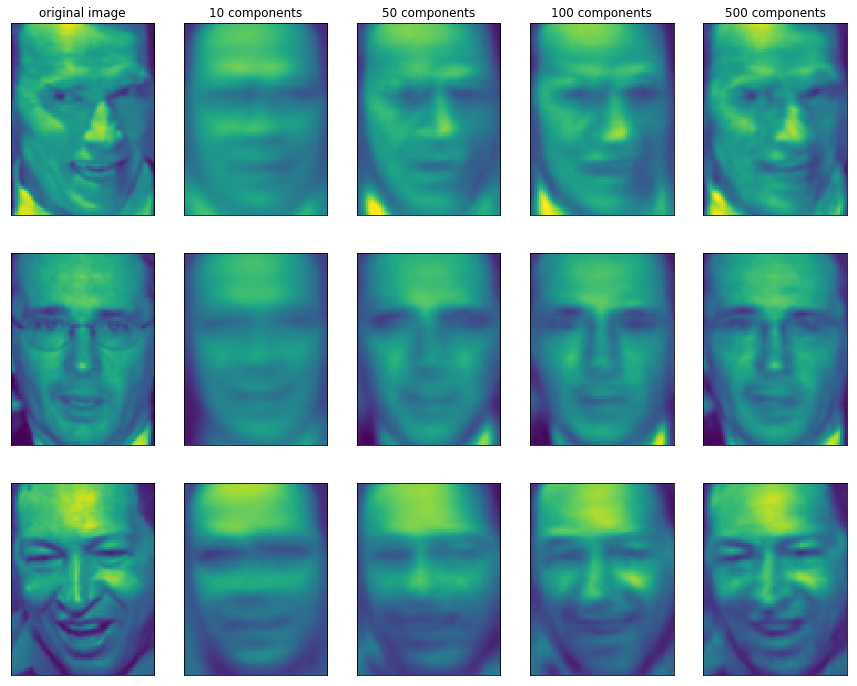

In [32]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

- 逆変換したときのデータの質はPCAを用いたときと似た傾向だが少し悪い


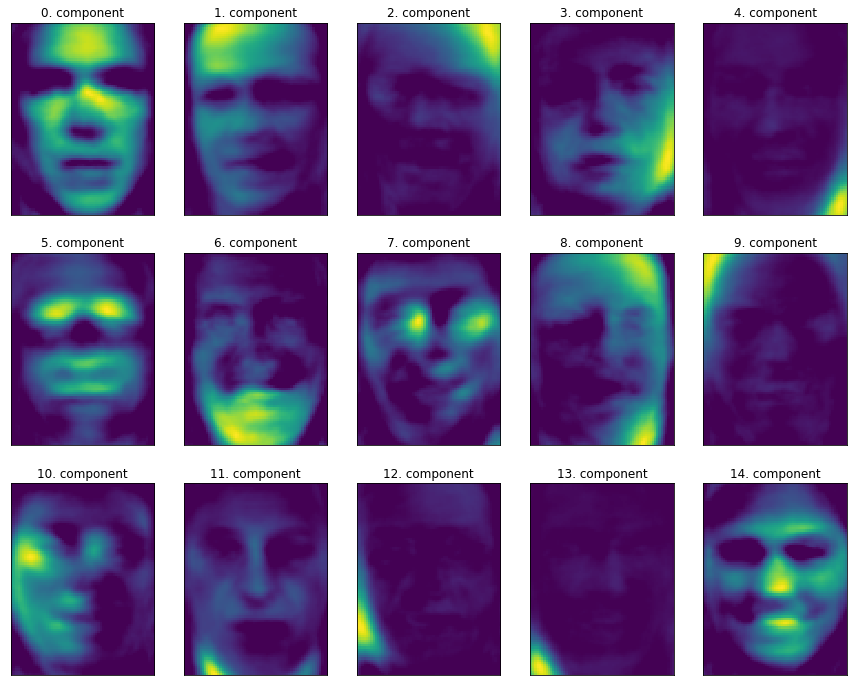

In [37]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

- 成分は全て正なのでPCAで得られた成分よりも顔のプロトタイプを捉えている

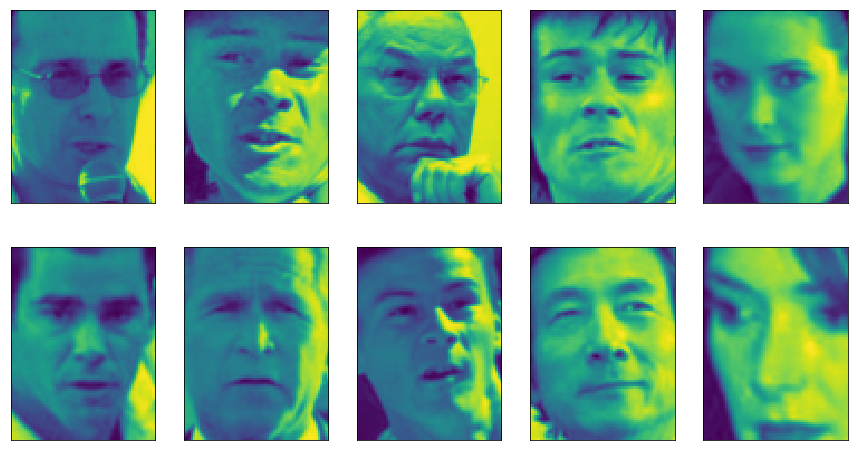

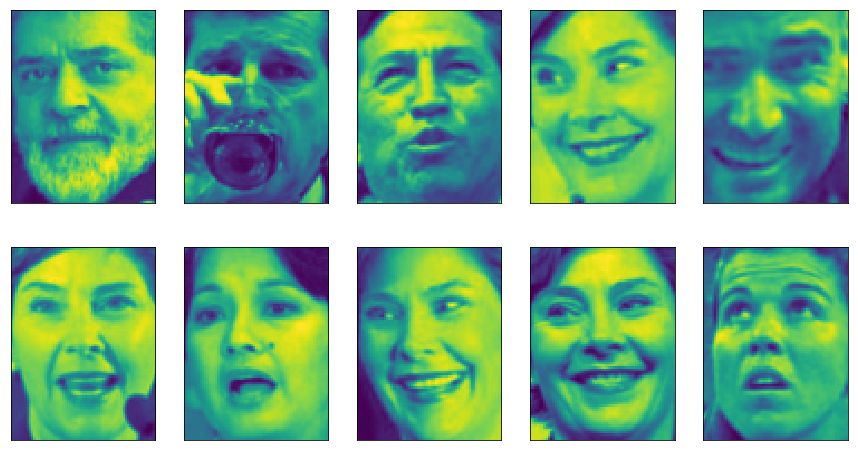

In [42]:
compn=3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn=7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

- 3つ目の成分と、7つ目の成分で画像をソート
- 3つ目の成分は右を向いており、7つ目は左を向いている

### 3つの信号源で検証

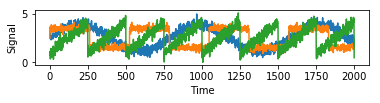

In [43]:
s = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(s, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [52]:
# データを混ぜて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(s, A.T)
print(f"Shape of measurements: {X.shape}")

Shape of measurements: (2000, 100)


In [48]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(f"Recoverd signal shape: {S_.shape}")

Recoverd signal shape: (2000, 3)


In [55]:
# 比較のためにPCAも使用
pca = PCA(n_components=3)
H = pca.fit_transform(X)

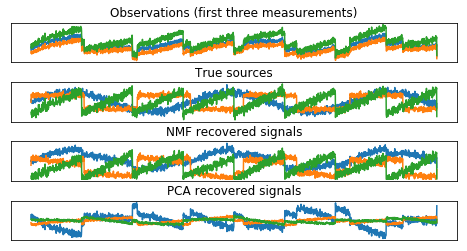

In [58]:
models = [X, s, S_, H]
names = ['Observations (first three measurements)',
           'True sources',
           'NMF recovered signals',
           'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')